In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

In [9]:
# 1️⃣ Iris 데이터 불러오기
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

In [10]:
# 타깃(종류) 추가
# df['species'] = iris.target
# df['species_name'] = df['species'].map({
#     0: 'setosa',
#     1: 'versicolor',
#     2: 'virginica'
# })

# ✅ 원본 타깃을 사람이 읽기 쉬운 라벨로 만들고(LabelEncoder로 인코딩)
# (교육 목적상 species_name을 먼저 만들고, 그걸 LabelEncoder로 숫자로 변환)
df["species_name"] = [iris.target_names[i] for i in iris.target]

le = LabelEncoder()
df["species_le"] = le.fit_transform(df["species_name"])  # setosa/versicolor/virginica -> 0/1/2

# (선택) 라벨 매핑 확인
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("LabelEncoder mapping:", label_mapping)

# 데이터 구조 확인 (교육용 권장)
print(df.info())

# 2️⃣ 기술통계량
print("\n기술통계량:\n", df.describe())

LabelEncoder mapping: {np.str_('setosa'): np.int64(0), np.str_('versicolor'): np.int64(1), np.str_('virginica'): np.int64(2)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_name       150 non-null    object 
 5   species_le         150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

기술통계량:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000        

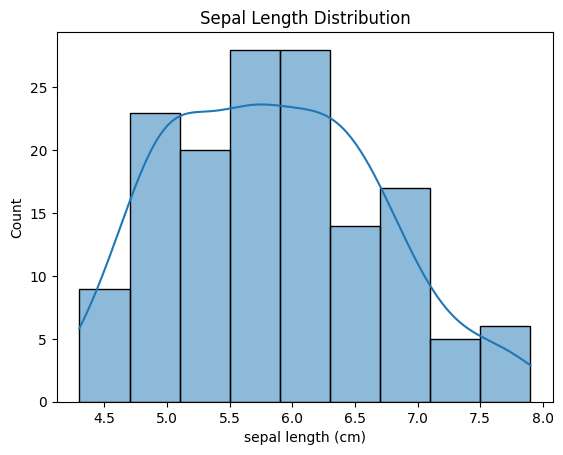

In [11]:
# 3️⃣ 히스토그램 (꽃받침 길이)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Sepal Length Distribution')
plt.show()

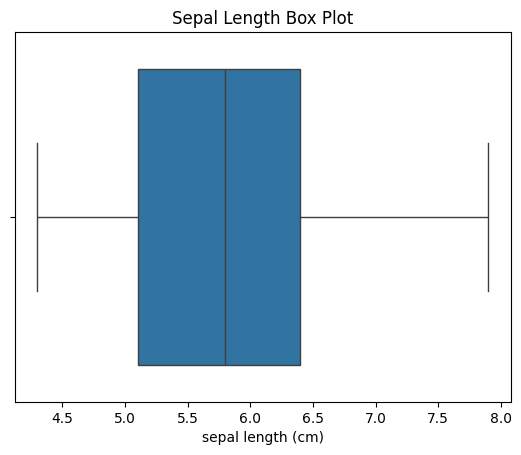

In [12]:
# 4️⃣ 박스플롯 (꽃받침 길이)
sns.boxplot(x=df['sepal length (cm)'])
plt.title('Sepal Length Box Plot')
plt.show()

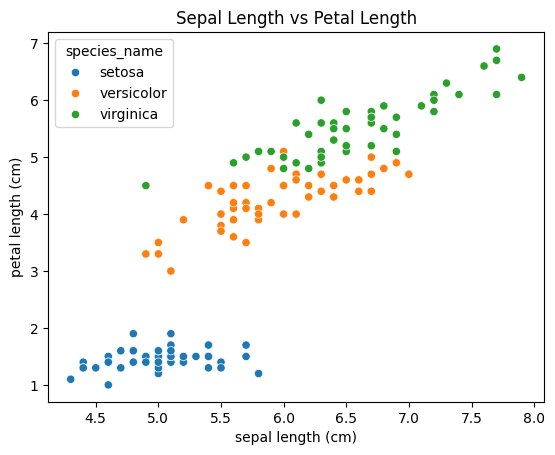

In [13]:
# 5️⃣ 산점도 (꽃받침 길이 vs 꽃잎 길이, 종별 색상)
sns.scatterplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='species_name',
    data=df
)
plt.title('Sepal Length vs Petal Length')
plt.show()


상관계수:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species_le                  0.782561         -0.426658           0.949035   

                   petal width (cm)  species_le  
sepal length (cm)          0.817941    0.782561  
sepal width (cm)          -0.366126   -0.426658  
petal length (cm)          0.962865    0.949035  
petal width (cm)           1.000000    0.956547  
species_le                 0.956547    1.000000  


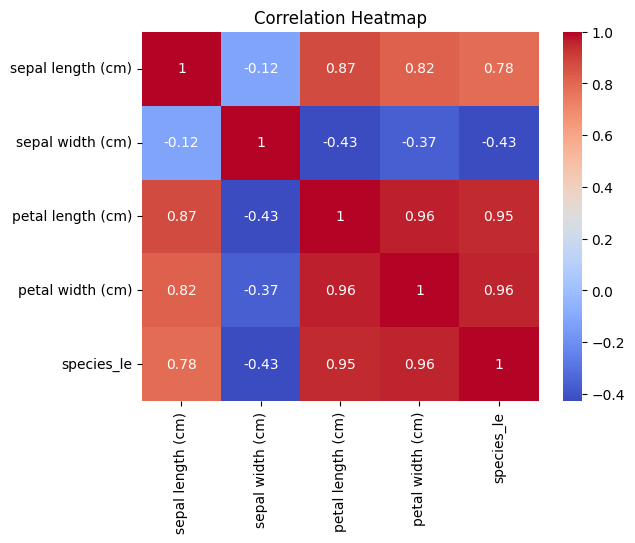

In [14]:
# 6️⃣ 상관 분석 (⭐ 숫자 컬럼만 선택 ⭐)
correlation = df.select_dtypes(include='number').corr()
print("\n상관계수:\n", correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()